In [65]:
import pandas as pd
# Pandas: Library for data manipulation and analysis, including DataFrame structures.

pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [66]:
import matplotlib.pyplot as plt
# Matplotlib: Library for creating static, interactive, and animated visualizations.

%matplotlib inline
# IPython magic command to display Matplotlib plots inline in Jupyter notebooks.

import seaborn as sns
sns.set_style('darkgrid')
# Seaborn: Library for statistical data visualization built on top of Matplotlib. 
# Set the default style for Seaborn plots to 'darkgrid'.

import warnings
warnings.filterwarnings("ignore")

In [67]:
first_df = pd.read_csv('split_out_data.csv')
first_df['date'] = pd.to_datetime(first_df['date'])
second_df = pd.read_csv('merged_big_df_split_rd.csv')
second_df['date'] = pd.to_datetime(second_df['date'])
first_df.tail()

,date,Work_Orders,Adelaide_ITA,Brisbane_ITA,Melbourne_ITA,Perth_IDC,Villawood_IDC,Yongah_Hill_IDC,month,year,day_of_week,day_of_month,day_of_year,Work_Orders_Lag_1,Work_Orders_step_1,Work_Orders_Lag_2,Work_Orders_step_2,Work_Orders_Lag_3,Work_Orders_step_3,Work_Orders_Lag_4,Work_Orders_step_4,Work_Orders_Lag_5,Work_Orders_step_5,Work_Orders_Lag_6,Work_Orders_step_6,Work_Orders_Lag_7,Work_Orders_step_7,Work_Orders_Lag_8,Work_Orders_step_8,Work_Orders_Lag_9,Work_Orders_step_9,Work_Orders_Lag_10,Work_Orders_step_10,Work_Orders_Lag_11,Work_Orders_step_11,Work_Orders_Lag_12,Work_Orders_step_12,Work_Orders_Lag_13,Work_Orders_step_13,Work_Orders_Lag_14,Work_Orders_step_14,Adelaide_ITA_Lag_1,Adelaide_ITA_step_1,Adelaide_ITA_Lag_2,Adelaide_ITA_step_2,Adelaide_ITA_Lag_3,Adelaide_ITA_step_3,Adelaide_ITA_Lag_4,Adelaide_ITA_step_4,Adelaide_ITA_Lag_5,...,Villawood_IDC_Lag_4,Villawood_IDC_step_4,Villawood_IDC_Lag_5,Villawood_IDC_step_5,Villawood_IDC_Lag_6,Villawood_IDC_step_6,Villawood_IDC_Lag_7,Villawood_IDC_step_7,Villawood_IDC_Lag_8,Villawood_IDC_step_8,Villawood_IDC_Lag_9,Villawood_IDC_step_9,Villawood_IDC_Lag_10,Villawood_IDC_step_10,Villawood_IDC_Lag_11,Villawood_IDC_step_11,Villawood_IDC_Lag_12,Villawood_IDC_step_12,Villawood_IDC_Lag_13,Villawood_IDC_step_13,Villawood_IDC_Lag_14,Villawood_IDC_step_14,Yongah_Hill_IDC_Lag_1,Yongah_Hill_IDC_step_1,Yongah_Hill_IDC_Lag_2,Yongah_Hill_IDC_step_2,Yongah_Hill_IDC_Lag_3,Yongah_Hill_IDC_step_3,Yongah_Hill_IDC_Lag_4,Yongah_Hill_IDC_step_4,Yongah_Hill_IDC_Lag_5,Yongah_Hill_IDC_step_5,Yongah_Hill_IDC_Lag_6,Yongah_Hill_IDC_step_6,Yongah_Hill_IDC_Lag_7,Yongah_Hill_IDC_step_7,Yongah_Hill_IDC_Lag_8,Yongah_Hill_IDC_step_8,Yongah_Hill_IDC_Lag_9,Yongah_Hill_IDC_step_9,Yongah_Hill_IDC_Lag_10,Yongah_Hill_IDC_step_10,Yongah_Hill_IDC_Lag_11,Yongah_Hill_IDC_step_11,Yongah_Hill_IDC_Lag_12,Yongah_Hill_IDC_step_12,Yongah_Hill_IDC_Lag_13,Yongah_Hill_IDC_step_13,Yongah_Hill_IDC_Lag_14,Yongah_Hill_IDC_step_14
923,2022-11-28,33,1,5,4,7,10,6,11,2022,0,28,332,11.0000,22.0000,12.0000,33.0000,36.0000,19.0000,36.0000,29.0000,42.0000,7.0000,38.0000,6.0000,31.0000,33.0000,17.0000,22.0000,9.0000,28.0000,35.0000,24.0000,39.0000,22.0000,44.0000,11.0000,29.0000,11.0000,28.0000,30.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,...,10.0000,13.0000,15.0000,4.0000,9.0000,4.0000,16.0000,9.0000,6.0000,10.0000,3.0000,8.0000,11.0000,8.0000,14.0000,6.0000,13.0000,1.0000,10.0000,4.0000,8.0000,7.0000,0.0000,4.0000,1.0000,5.0000,2.0000,6.0000,2.0000,4.0000,3.0000,0.0000,4.0000,0.0000,3.0000,5.0000,2.0000,4.0000,1.0000,4.0000,3.0000,4.0000,4.0000,5.0000,3.0000,2.0000,4.0000,1.0000,3.0000,4.0000
924,2022-11-29,22,0,8,3,2,5,4,11,2022,1,29,333,33.0000,33.0000,11.0000,19.0000,12.0000,29.0000,36.0000,7.0000,36.0000,6.0000,42.0000,33.0000,38.0000,22.0000,31.0000,28.0000,17.0000,24.0000,9.0000,22.0000,35.0000,11.0000,39.0000,11.0000,44.0000,30.0000,29.0000,34.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,...,8.0000,4.0000,10.0000,4.0000,15.0000,9.0000,9.0000,10.0000,16.0000,8.0000,6.0000,8.0000,3.0000,6.0000,11.0000,1.0000,14.0000,4.0000,13.0000,7.0000,10.0000,8.0000,6.0000,5.0000,0.0000,6.0000,1.0000,4.0000,2.0000,0.0000,2.0000,0.0000,3.0000,5.0000,4.0000,4.0000,3.0000,4.0000,2.0000,4.0000,1.0000,5.0000,3.0000,2.0000,4.0000,1.0000,3.0000,4.0000,4.0000,5.0000
925,2022-11-30,33,1,6,5,4,12,5,11,2022,2,30,334,22.0000,19.0000,33.0000,29.0000,11.0000,7.0000,12.0000,6.0000,36.0000,33.0000,36.0000,22.0000,42.0000,28.0000,38.0000,24.0000,31.0000,22.0000,17.0000,11.0000,9.0000,11.0000,35.0000,30.0000,39.0000,34.0000,44.0000,33.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,...,6.0000,4.0000,8.0000,9.0000,10.0000,10.0000,15.0000,8.0000,9.0000,8.0000,16.0000,6.0000,6.0000,1.0000,3.0000,4.0000,11.0000,7.0000,14.0000,8.0000,13.0000,11.0000,4.0000,6.0000,6.0000,4.0000,0.0000,0.0000,1.0000,0.0000,2.0000,5.0000,2.0000,4.0000,3.0000,4.0000,4.0000,4.0000,3.0000,5.0000,2.0000,2.0000,1.0000,1.0000,3.0000

In [68]:
first_df.iloc[-1,0] + pd.Timedelta(days=1)

Timestamp('2022-12-03 00:00:00')

In [69]:
split_prediction = pd.DataFrame(columns=first_df.columns)
split_prediction.loc[0,[col for col in first_df.columns if 'step' not in col and 'Lag' not in col and col not in ['date', 'month','year','day_of_week','day_of_month','day_of_year']]] = first_df.loc[len(first_df)-1,[col for col in first_df.columns if '14' in col and 'step' in col]].values
split_prediction.loc[0,[col for col in first_df.columns if 'Lag' in col]] = first_df.loc[len(first_df)-1,[col for col in first_df.columns if 'step' not in col and 'Lag' not in col and col not in ['date', 'month','year','day_of_week','day_of_month','day_of_year']]+[col for col in first_df.columns if 'step' in col and '14' not in col]].values
split_prediction.loc[0,'date'] =  first_df.loc[len(first_df)-1,:].date + pd.Timedelta(days=14)

split_prediction.loc[0,'month'] = split_prediction.loc[0,'date'].month
split_prediction.loc[0,'year'] = split_prediction.loc[0,'date'].year
split_prediction.loc[0,'day_of_week'] = split_prediction.loc[0,'date'].dayofweek
split_prediction.loc[0,'day_of_month'] = split_prediction.loc[0,'date'].day
split_prediction.loc[0,'day_of_year'] = split_prediction.loc[0,'date'].dayofyear
split_prediction.dropna(axis=1)

,date,Work_Orders,Adelaide_ITA,Brisbane_ITA,Melbourne_ITA,Perth_IDC,Villawood_IDC,Yongah_Hill_IDC,month,year,day_of_week,day_of_month,day_of_year,Work_Orders_Lag_1,Work_Orders_Lag_2,Work_Orders_Lag_3,Work_Orders_Lag_4,Work_Orders_Lag_5,Work_Orders_Lag_6,Work_Orders_Lag_7,Work_Orders_Lag_8,Work_Orders_Lag_9,Work_Orders_Lag_10,Work_Orders_Lag_11,Work_Orders_Lag_12,Work_Orders_Lag_13,Work_Orders_Lag_14,Adelaide_ITA_Lag_1,Adelaide_ITA_Lag_2,Adelaide_ITA_Lag_3,Adelaide_ITA_Lag_4,Adelaide_ITA_Lag_5,Adelaide_ITA_Lag_6,Adelaide_ITA_Lag_7,Adelaide_ITA_Lag_8,Adelaide_ITA_Lag_9,Adelaide_ITA_Lag_10,Adelaide_ITA_Lag_11,Adelaide_ITA_Lag_12,Adelaide_ITA_Lag_13,Adelaide_ITA_Lag_14,Brisbane_ITA_Lag_1,Brisbane_ITA_Lag_2,Brisbane_ITA_Lag_3,Brisbane_ITA_Lag_4,Brisbane_ITA_Lag_5,Brisbane_ITA_Lag_6,Brisbane_ITA_Lag_7,Brisbane_ITA_Lag_8,Brisbane_ITA_Lag_9,...,Melbourne_ITA_Lag_7,Melbourne_ITA_Lag_8,Melbourne_ITA_Lag_9,Melbourne_ITA_Lag_10,Melbourne_ITA_Lag_11,Melbourne_ITA_Lag_12,Melbourne_ITA_Lag_13,Melbourne_ITA_Lag_14,Perth_IDC_Lag_1,Perth_IDC_Lag_2,Perth_IDC_Lag_3,Perth_IDC_Lag_4,Perth_IDC_Lag_5,Perth_IDC_Lag_6,Perth_IDC_Lag_7,Perth_IDC_Lag_8,Perth_IDC_Lag_9,Perth_IDC_Lag_10,Perth_IDC_Lag_11,Perth_IDC_Lag_12,Perth_IDC_Lag_13,Perth_IDC_Lag_14,Villawood_IDC_Lag_1,Villawood_IDC_Lag_2,Villawood_IDC_Lag_3,Villawood_IDC_Lag_4,Villawood_IDC_Lag_5,Villawood_IDC_Lag_6,Villawood_IDC_Lag_7,Villawood_IDC_Lag_8,Villawood_IDC_Lag_9,Villawood_IDC_Lag_10,Villawood_IDC_Lag_11,Villawood_IDC_Lag_12,Villawood_IDC_Lag_13,Villawood_IDC_Lag_14,Yongah_Hill_IDC_Lag_1,Yongah_Hill_IDC_Lag_2,Yongah_Hill_IDC_Lag_3,Yongah_Hill_IDC_Lag_4,Yongah_Hill_IDC_Lag_5,Yongah_Hill_IDC_Lag_6,Yongah_Hill_IDC_Lag_7,Yongah_Hill_IDC_Lag_8,Yongah_Hill_IDC_Lag_9,Yongah_Hill_IDC_Lag_10,Yongah_Hill_IDC_Lag_11,Yongah_Hill_IDC_Lag_12,Yongah_Hill_IDC_Lag_13,Yongah_Hill_IDC_Lag_14
0,2022-12-16 00:00:00,5.0000,1.0000,0.0000,0.0000,4.0000,0.0000,0.0000,12,2022,4,16,350,29,0,7,2,3,13,4,7.0000,6.0000,33.0000,22.0000,28.0000,24.0000,22.0000,11.0000,11.0000,30.0000,34.0000,33.0000,27.0000,0.0000,0.0000,2.0000,1.0000,5.0000,0.0000,0.0000,3.0000,0.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,10.0000,3.0000,...,4.0000,2.0000,2.0000,4.0000,3.0000,2.0000,1.0000,4.0000,5.0000,6.0000,7.0000,1.0000,0.0000,3.0000,2.0000,3.0000,1.0000,3.0000,1.0000,2.0000,2.0000,5.0000,3.0000,0.0000,4.0000,4.0000,9.0000,10.0000,8.0000,8.0000,6.0000,1.0000,4.0000,7.0000,8.0000,11.0000,8.0000,0.0000,0.0000,5.0000,4.0000,4.0000,4.0000,5.0000,2.0000,1.0000,4.0000,5.0000,4.0000,6.0000


In [70]:
import joblib


lr_model_filename = 'lr_model_split.pkl'
lr_best_model = joblib.load(lr_model_filename)


xgb_model_filename = 'xgb_model_split.pkl'
best_xgb_model = joblib.load(xgb_model_filename)

xgb_columns = pd.read_csv('xgb_data_columns.csv').iloc[:,1:].astype(float).columns
lr_columns = pd.read_csv('lr_data_columns.csv').iloc[:,1:].astype(float).columns

In [71]:
X = split_prediction.dropna(axis=1).iloc[:,1:].astype(float)

# Make predictions
xgb_preds = best_xgb_model.predict(X[xgb_columns]).round()
lr_preds = lr_best_model.predict(X[lr_columns]).round()

# Combine predictions (simple average)
hybrid_preds = ((xgb_preds + lr_preds) / 2).round()[0]

hybrid_preds

array([24., 30., 36., 37., 26., 28., 20., 28., 41., 48., 40., 30., 26.,
       20.,  4.,  4.,  4.,  4.,  2.,  2.,  2.,  2.,  3.,  3.,  2.,  2.,
        2.,  2.,  6.,  9., 10., 10.,  9., 10.,  8., 10., 10., 14., 12.,
       10.,  8.,  8.,  2.,  2.,  4.,  4.,  6.,  6.,  4.,  6.,  6.,  6.,
        7.,  6.,  6.,  4.,  6.,  6.,  5.,  6.,  4.,  4.,  3.,  4.,  4.,
        4.,  6.,  4.,  4.,  4.,  8.,  9.,  9., 10.,  8.,  8.,  6.,  8.,
       12., 12., 12.,  8.,  8.,  4.,  5.,  6.,  6.,  6.,  4.,  4.,  3.,
        4.,  5.,  6.,  5.,  4.,  5.,  4.])

In [72]:
hybrid_preds.shape

(98,)

In [73]:
split_prediction[[col for col in split_prediction.columns if 'step' in col]] = hybrid_preds
split_prediction[[col for col in split_prediction.columns if 'step' in col]]

,Work_Orders_step_1,Work_Orders_step_2,Work_Orders_step_3,Work_Orders_step_4,Work_Orders_step_5,Work_Orders_step_6,Work_Orders_step_7,Work_Orders_step_8,Work_Orders_step_9,Work_Orders_step_10,Work_Orders_step_11,Work_Orders_step_12,Work_Orders_step_13,Work_Orders_step_14,Adelaide_ITA_step_1,Adelaide_ITA_step_2,Adelaide_ITA_step_3,Adelaide_ITA_step_4,Adelaide_ITA_step_5,Adelaide_ITA_step_6,Adelaide_ITA_step_7,Adelaide_ITA_step_8,Adelaide_ITA_step_9,Adelaide_ITA_step_10,Adelaide_ITA_step_11,Adelaide_ITA_step_12,Adelaide_ITA_step_13,Adelaide_ITA_step_14,Brisbane_ITA_step_1,Brisbane_ITA_step_2,Brisbane_ITA_step_3,Brisbane_ITA_step_4,Brisbane_ITA_step_5,Brisbane_ITA_step_6,Brisbane_ITA_step_7,Brisbane_ITA_step_8,Brisbane_ITA_step_9,Brisbane_ITA_step_10,Brisbane_ITA_step_11,Brisbane_ITA_step_12,Brisbane_ITA_step_13,Brisbane_ITA_step_14,Melbourne_ITA_step_1,Melbourne_ITA_step_2,Melbourne_ITA_step_3,Melbourne_ITA_step_4,Melbourne_ITA_step_5,Melbourne_ITA_step_6,Melbourne_ITA_step_7,Melbourne_ITA_step_8,Melbourne_ITA_step_9,Melbourne_ITA_step_10,Melbourne_ITA_step_11,Melbourne_ITA_step_12,Melbourne_ITA_step_13,Melbourne_ITA_step_14,Perth_IDC_step_1,Perth_IDC_step_2,Perth_IDC_step_3,Perth_IDC_step_4,Perth_IDC_step_5,Perth_IDC_step_6,Perth_IDC_step_7,Perth_IDC_step_8,Perth_IDC_step_9,Perth_IDC_step_10,Perth_IDC_step_11,Perth_IDC_step_12,Perth_IDC_step_13,Perth_IDC_step_14,Villawood_IDC_step_1,Villawood_IDC_step_2,Villawood_IDC_step_3,Villawood_IDC_step_4,Villawood_IDC_step_5,Villawood_IDC_step_6,Villawood_IDC_step_7,Villawood_IDC_step_8,Villawood_IDC_step_9,Villawood_IDC_step_10,Villawood_IDC_step_11,Villawood_IDC_step_12,Villawood_IDC_step_13,Villawood_IDC_step_14,Yongah_Hill_IDC_step_1,Yongah_Hill_IDC_step_2,Yongah_Hill_IDC_step_3,Yongah_Hill_IDC_step_4,Yongah_Hill_IDC_step_5,Yongah_Hill_IDC_step_6,Yongah_Hill_IDC_step_7,Yongah_Hill_IDC_step_8,Yongah_Hill_IDC_step_9,Yongah_Hill_IDC_step_10,Yongah_Hill_IDC_step_11,Yongah_Hill_IDC_step_12,Yongah_Hill_IDC_step_13,Yongah_Hill_IDC_step_14
0,24.0000,30.0000,36.0000,37.0000,26.0000,28.0000,20.0000,28.0000,41.0000,48.0000,40.0000,30.0000,26.0000,20.0000,4.0000,4.0000,4.0000,4.0000,2.0000,2.0000,2.0000,2.0000,3.0000,3.0000,2.0000,2.0000,2.0000,2.0000,6.0000,9.0000,10.0000,10.0000,9.0000,10.0000,8.0000,10.0000,10.0000,14.0000,12.0000,10.0000,8.0000,8.0000,2.0000,2.0000,4.0000,4.0000,6.0000,6.0000,4.0000,6.0000,6.0000,6.0000,7.0000,6.0000,6.0000,4.0000,6.0000,6.0000,5.0000,6.0000,4.0000,4.0000,3.0000,4.0000,4.0000,4.0000,6.0000,4.0000,4.0000,4.0000,8.0000,9.0000,9.0000,10.0000,8.0000,8.0000,6.0000,8.0000,12.0000,12.0000,12.0000,8.0000,8.0000,4.0000,5.0000,6.0000,6.0000,6.0000,4.0000,4.0000,3.0000,4.0000,5.0000,6.0000,5.0000,4.0000,5.0000,4.0000


In [74]:
second_df.head()

,date,Work_Orders,Adelaide_ITA,Brisbane_ITA,Melbourne_ITA,Perth_IDC,Villawood_IDC,Yongah_Hill_IDC,month,year,day_of_week,day_of_month,day_of_year,Facility_Name__c,Location_Risk_Assessment__c,Escort_Risk_Assessment__c,WO_Vol,duration_bin,workorder_id
0,2020-05-15,20,2,7,3,2,3,3,5,2020,4,15,136,0,0,0,10,0,1
1,2020-05-15,20,2,7,3,2,3,3,5,2020,4,15,136,1,1,1,4,1,2
2,2020-05-15,20,2,7,3,2,3,3,5,2020,4,15,136,1,1,1,4,1,3
3,2020-05-15,20,2,7,3,2,3,3,5,2020,4,15,136,2,2,1,2,0,4
4,2020-05-15,20,2,7,3,2,3,3,5,2020,4,15,136,3,0,0,4,2,5


In [75]:
wo_vo_prediction = pd.DataFrame(columns=second_df.columns)
idx = 0

for step in range(1,15):
    wo_vo_prediction.loc[idx,second_df.iloc[:,1:8].columns] =  split_prediction[[col+'_step_'+str(step) for col in second_df.iloc[:,1:8].columns]].values
    wo_vo_prediction.loc[idx,'date'] =  split_prediction.loc[0,'date'] + pd.Timedelta(days=step)

    wo_vo_prediction.loc[idx,'month'] = wo_vo_prediction.loc[idx,'date'].month
    wo_vo_prediction.loc[idx,'year'] = wo_vo_prediction.loc[idx,'date'].year
    wo_vo_prediction.loc[idx,'day_of_week'] = wo_vo_prediction.loc[idx,'date'].dayofweek
    wo_vo_prediction.loc[idx,'day_of_month'] = wo_vo_prediction.loc[idx,'date'].day
    wo_vo_prediction.loc[idx,'day_of_year'] = wo_vo_prediction.loc[idx,'date'].dayofyear
    idx += 1

wo_vo_prediction

,date,Work_Orders,Adelaide_ITA,Brisbane_ITA,Melbourne_ITA,Perth_IDC,Villawood_IDC,Yongah_Hill_IDC,month,year,day_of_week,day_of_month,day_of_year,Facility_Name__c,Location_Risk_Assessment__c,Escort_Risk_Assessment__c,WO_Vol,duration_bin,workorder_id
0,2022-12-17 00:00:00,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-12-18 00:00:00,30.0000,4.0000,9.0000,2.0000,6.0000,9.0000,6.0000,12,2022,6,18,352,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-12-19 00:00:00,36.0000,4.0000,10.0000,4.0000,5.0000,9.0000,6.0000,12,2022,0,19,353,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-12-20 00:00:00,37.0000,4.0000,10.0000,4.0000,6.0000,10.0000,6.0000,12,2022,1,20,354,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-12-21 00:00:00,26.0000,2.0000,9.0000,6.0000,4.0000,8.0000,4.0000,12,2022,2,21,355,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-12-22 00:00:00,28.0000,2.0000,10.0000,6.0000,4.0000,8.0000,4.0000,12,2022,3,22,356,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-12-23 00:00:00,20.0000,2.0000,8.0000,4.0000,3.0000,6.0000,3.0000,12,2022,4,23,357,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-12-24 00:00:00,28.0000,2.0000,10.0000,6.0000,4.0000,8.0000,4.0000,12,2022,5,24,358,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-12-25 00:00:00,41.0000,3.0000,10.0000,6.0000,4.0000,12.0000,5.0000,12,2022,6,25,359,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-12-26 00:00:00,48.0000,3.0000,14.0000,6.0000,4.0000,12.0000,6.0000,12,2022,0,26,360,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
wo_df = pd.DataFrame(columns=second_df.columns)
idx = 0
for col in wo_vo_prediction.iloc[:,2:8]:
    for idx_ in range(len(wo_vo_prediction)):
        facility_count = int(wo_vo_prediction.loc[idx_, col])
        for i in range(1, facility_count+1):
            wo_df.loc[idx, wo_vo_prediction.columns[:-3]] = wo_vo_prediction.loc[idx_, wo_vo_prediction.columns[:-3]]
            wo_df.loc[idx, 'Facility_Name__c'] = col
            wo_df.loc[idx, 'workorder_id'] = i
            idx += 1
wo_df

,date,Work_Orders,Adelaide_ITA,Brisbane_ITA,Melbourne_ITA,Perth_IDC,Villawood_IDC,Yongah_Hill_IDC,month,year,day_of_week,day_of_month,day_of_year,Facility_Name__c,Location_Risk_Assessment__c,Escort_Risk_Assessment__c,WO_Vol,duration_bin,workorder_id
0,2022-12-17 00:00:00,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,Adelaide_ITA,NaN,NaN,NaN,NaN,1
1,2022-12-17 00:00:00,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,Adelaide_ITA,NaN,NaN,NaN,NaN,2
2,2022-12-17 00:00:00,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,Adelaide_ITA,NaN,NaN,NaN,NaN,3
3,2022-12-17 00:00:00,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,Adelaide_ITA,NaN,NaN,NaN,NaN,4
4,2022-12-18 00:00:00,30.0000,4.0000,9.0000,2.0000,6.0000,9.0000,6.0000,12,2022,6,18,352,Adelaide_ITA,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2022-12-29 00:00:00,26.0000,2.0000,8.0000,6.0000,4.0000,8.0000,5.0000,12,2022,3,29,363,Yongah_Hill_IDC,NaN,NaN,NaN,NaN,5
490,2022-12-30 00:00:00,20.0000,2.0000,8.0000,4.0000,4.0000,4.0000,4.0000,12,2022,4,30,364,Yongah_Hill_IDC,NaN,NaN,NaN,NaN,1
491,2022-12-30 00:00:00,20.0000,2.0000,8.0000,4.0000,4.0000,4.0000,4.0000,12,2022,4,30,364,Yongah_Hill_IDC,NaN,NaN,NaN,NaN,2
492,2022-12-30 00:00:00,20.0000,2.0000,8.0000,4.0000,4.0000,4.0000,4.0000,12,2022,4,30,364,Yongah_Hill_IDC,NaN,NaN,NaN,NaN,3


In [77]:
xgb_model_filename = 'xgb_model_WO_vol.pkl'
xgb_model = joblib.load(xgb_model_filename)

In [78]:
wo_df['Facility_Name__c'].unique()

array(['Adelaide_ITA', 'Brisbane_ITA', 'Melbourne_ITA', 'Perth_IDC',
       'Villawood_IDC', 'Yongah_Hill_IDC'], dtype=object)

In [79]:
X = wo_df.drop(['WO_Vol','date','Location_Risk_Assessment__c','Escort_Risk_Assessment__c','duration_bin'], axis=1)

# Your list of category labels
category_labels = ['Brisbane ITA', 'North West Point Immigration Facility',
       'Perth IDC', 'Melbourne ITA', 'Adelaide ITA', 'Villawood IDC',
       'Yongah Hill IDC', 'Northern APOD']

# Create a manual encoding dictionary
manual_encodings = {label:index  for index, label in enumerate(category_labels)}

# Apply manual encoding
for label in category_labels:
    X.loc[X['Facility_Name__c'] == label.replace(' ','_'), 'Facility_Name__c'] = [value for key, value in manual_encodings.items() if value == manual_encodings[label]][0]


X

,Work_Orders,Adelaide_ITA,Brisbane_ITA,Melbourne_ITA,Perth_IDC,Villawood_IDC,Yongah_Hill_IDC,month,year,day_of_week,day_of_month,day_of_year,Facility_Name__c,workorder_id
0,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,4,1
1,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,4,2
2,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,4,3
3,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,4,4
4,30.0000,4.0000,9.0000,2.0000,6.0000,9.0000,6.0000,12,2022,6,18,352,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,26.0000,2.0000,8.0000,6.0000,4.0000,8.0000,5.0000,12,2022,3,29,363,6,5
490,20.0000,2.0000,8.0000,4.0000,4.0000,4.0000,4.0000,12,2022,4,30,364,6,1
491,20.0000,2.0000,8.0000,4.0000,4.0000,4.0000,4.0000,12,2022,4,30,364,6,2
492,20.0000,2.0000,8.0000,4.0000,4.0000,4.0000,4.0000,12,2022,4,30,364,6,3


In [80]:
manual_encodings

{'Brisbane ITA': 0,
 'North West Point Immigration Facility': 1,
 'Perth IDC': 2,
 'Melbourne ITA': 3,
 'Adelaide ITA': 4,
 'Villawood IDC': 5,
 'Yongah Hill IDC': 6,
 'Northern APOD': 7}

In [81]:
# Make predictions
xgb_preds = pd.Series(xgb_model.predict(X.astype(float)).round())
xgb_preds[xgb_preds < 1] = xgb_preds.mode()[0]

xgb_preds.values

array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  1.,  1.,  1.,  1.,
        2.,  2.,  2.,  4.,  1.,  4.,  4.,  2.,  1.,  1.,  4.,  3.,  4.,
        4.,  3.,  3.,  3.,  3.,  3.,  2.,  2.,  2.,  2.,  1.,  1.,  7.,
        7.,  7.,  7.,  7.,  7., 10., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 11.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9., 12., 12., 12., 12., 12., 12., 12., 12., 12.,
       12.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 14., 13., 13., 13., 13.,
       13., 13., 13., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 15., 11., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 11., 11., 11., 11., 11., 11., 11., 11., 11., 12.,
       10., 10., 10., 10., 10., 10., 10., 10.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  3.,  2.,  3.,  3.,  1.,  2.,  3.,  3.,  3

In [82]:
wo_df['WO_Vol'] = xgb_preds.values
wo_df

,date,Work_Orders,Adelaide_ITA,Brisbane_ITA,Melbourne_ITA,Perth_IDC,Villawood_IDC,Yongah_Hill_IDC,month,year,day_of_week,day_of_month,day_of_year,Facility_Name__c,Location_Risk_Assessment__c,Escort_Risk_Assessment__c,WO_Vol,duration_bin,workorder_id
0,2022-12-17 00:00:00,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,Adelaide_ITA,NaN,NaN,2.0000,NaN,1
1,2022-12-17 00:00:00,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,Adelaide_ITA,NaN,NaN,2.0000,NaN,2
2,2022-12-17 00:00:00,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,Adelaide_ITA,NaN,NaN,2.0000,NaN,3
3,2022-12-17 00:00:00,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,Adelaide_ITA,NaN,NaN,2.0000,NaN,4
4,2022-12-18 00:00:00,30.0000,4.0000,9.0000,2.0000,6.0000,9.0000,6.0000,12,2022,6,18,352,Adelaide_ITA,NaN,NaN,2.0000,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2022-12-29 00:00:00,26.0000,2.0000,8.0000,6.0000,4.0000,8.0000,5.0000,12,2022,3,29,363,Yongah_Hill_IDC,NaN,NaN,5.0000,NaN,5
490,2022-12-30 00:00:00,20.0000,2.0000,8.0000,4.0000,4.0000,4.0000,4.0000,12,2022,4,30,364,Yongah_Hill_IDC,NaN,NaN,3.0000,NaN,1
491,2022-12-30 00:00:00,20.0000,2.0000,8.0000,4.0000,4.0000,4.0000,4.0000,12,2022,4,30,364,Yongah_Hill_IDC,NaN,NaN,3.0000,NaN,2
492,2022-12-30 00:00:00,20.0000,2.0000,8.0000,4.0000,4.0000,4.0000,4.0000,12,2022,4,30,364,Yongah_Hill_IDC,NaN,NaN,3.0000,NaN,3


In [83]:
xgb_loc_risk = joblib.load('xgb_model_Location_Risk_Assessment__c.pkl')
xgb_esc_risk = joblib.load('xgb_model_Escort_Risk_Assessment__c.pkl')
xgb_du_risk = joblib.load('xgb_model_duration_bin.pkl')

def reverse_manual_encoding(col, dct):

    col_ = col.copy()
    # Your list of category labels
    numeric_labels = col.unique()

    # Apply manual encoding
    for label in numeric_labels:
        col_.loc[col_ == label] = dct[label]

    return col_

# Make predictions
xgb_loc_preds = pd.Series(xgb_loc_risk.predict(X.astype(float)).round())
wo_df['Location_Risk_Assessment__c'] = reverse_manual_encoding(xgb_loc_preds, {0: 'High', 1: 'Medium', 2: 'Low', 3: 'Extreme'}).values


# Make predictions
xgb_esc_preds = pd.Series(xgb_esc_risk.predict(X.astype(float)).round())
wo_df['Escort_Risk_Assessment__c'] = reverse_manual_encoding(xgb_esc_preds, {0: 'High', 1: 'Medium', 2: 'Extreme', 3: 'Low'}).values


# Make predictions
xgb_du_preds = pd.Series(xgb_du_risk.predict(X.astype(float)).round())
wo_df['duration_bin'] = reverse_manual_encoding(xgb_du_preds, {0: '3 hour bin', 1: '1 hour bin', 2: '4 hour bin', 3: '2 hour bin', 4: '4+ hour bin'}).values

In [84]:
wo_df

,date,Work_Orders,Adelaide_ITA,Brisbane_ITA,Melbourne_ITA,Perth_IDC,Villawood_IDC,Yongah_Hill_IDC,month,year,day_of_week,day_of_month,day_of_year,Facility_Name__c,Location_Risk_Assessment__c,Escort_Risk_Assessment__c,WO_Vol,duration_bin,workorder_id
0,2022-12-17 00:00:00,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,Adelaide_ITA,High,High,2.0000,4+ hour bin,1
1,2022-12-17 00:00:00,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,Adelaide_ITA,High,High,2.0000,4+ hour bin,2
2,2022-12-17 00:00:00,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,Adelaide_ITA,High,High,2.0000,3 hour bin,3
3,2022-12-17 00:00:00,24.0000,4.0000,6.0000,2.0000,6.0000,8.0000,5.0000,12,2022,5,17,351,Adelaide_ITA,High,High,2.0000,4+ hour bin,4
4,2022-12-18 00:00:00,30.0000,4.0000,9.0000,2.0000,6.0000,9.0000,6.0000,12,2022,6,18,352,Adelaide_ITA,High,High,2.0000,4+ hour bin,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,2022-12-29 00:00:00,26.0000,2.0000,8.0000,6.0000,4.0000,8.0000,5.0000,12,2022,3,29,363,Yongah_Hill_IDC,High,High,5.0000,4+ hour bin,5
490,2022-12-30 00:00:00,20.0000,2.0000,8.0000,4.0000,4.0000,4.0000,4.0000,12,2022,4,30,364,Yongah_Hill_IDC,High,High,3.0000,4+ hour bin,1
491,2022-12-30 00:00:00,20.0000,2.0000,8.0000,4.0000,4.0000,4.0000,4.0000,12,2022,4,30,364,Yongah_Hill_IDC,High,High,3.0000,4+ hour bin,2
492,2022-12-30 00:00:00,20.0000,2.0000,8.0000,4.0000,4.0000,4.0000,4.0000,12,2022,4,30,364,Yongah_Hill_IDC,High,High,3.0000,4+ hour bin,3


In [85]:
wo_df.Location_Risk_Assessment__c.value_counts()

Location_Risk_Assessment__c
High    494
Name: count, dtype: int64

In [86]:
wo_df.Escort_Risk_Assessment__c.value_counts()

Escort_Risk_Assessment__c
High      456
Medium     38
Name: count, dtype: int64

In [87]:
wo_df.duration_bin.value_counts()

duration_bin
4+ hour bin    320
2 hour bin      84
3 hour bin      67
4 hour bin      17
1 hour bin       6
Name: count, dtype: int64

In [88]:
wo_df.to_csv('Deployment_data.csv', index=False)

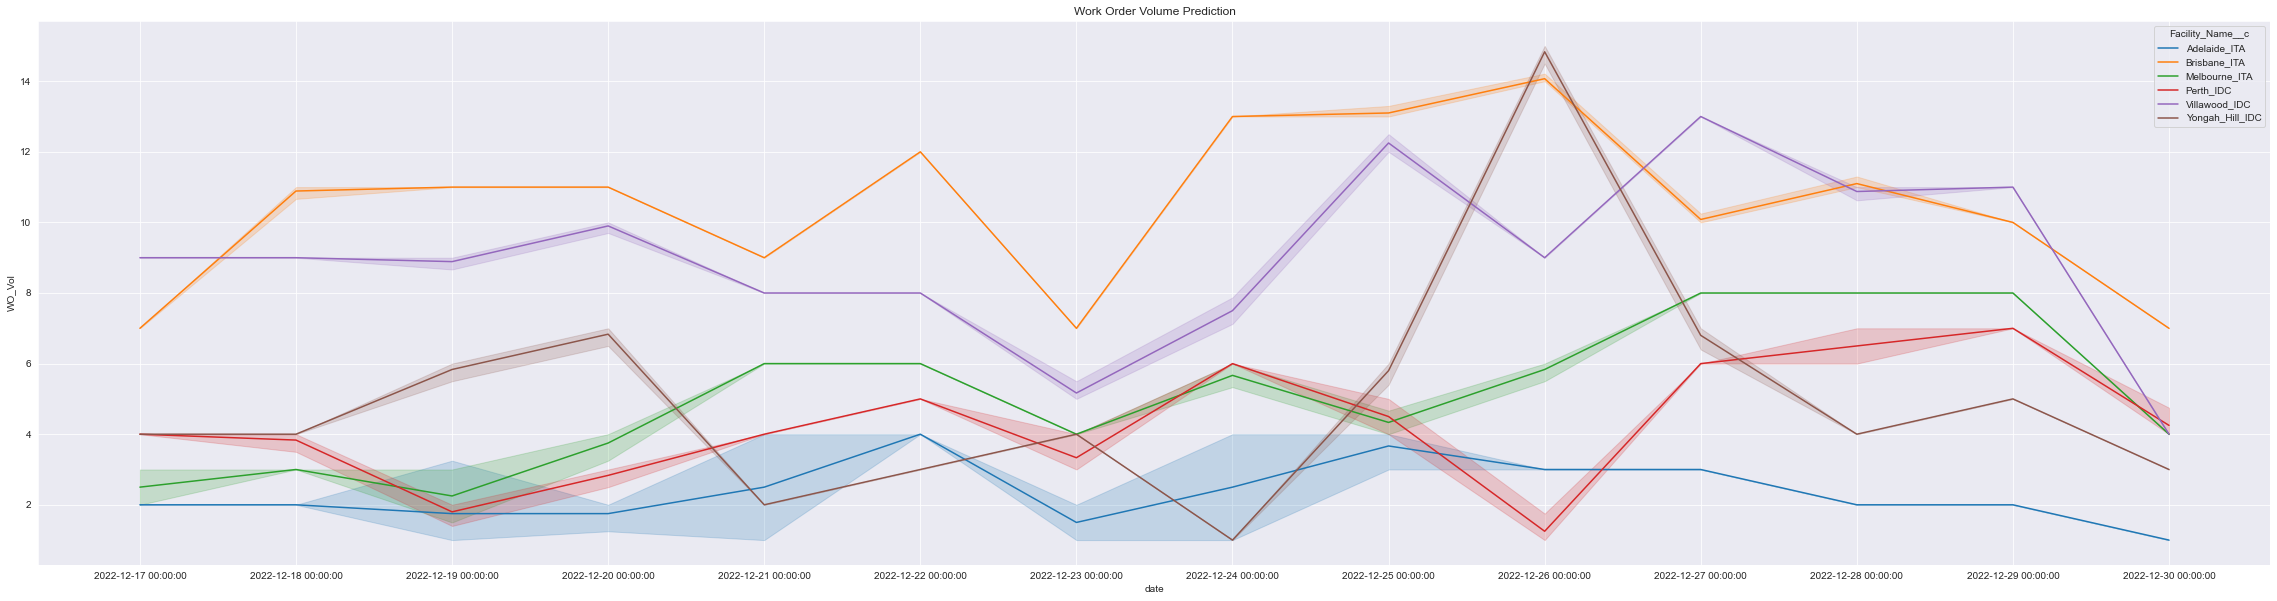

In [89]:
wo_df = pd.read_csv('Deployment_data.csv')
# Create a larger figure
plt.figure(figsize=(40, 10))  # Adjust the size as needed

# Create the line plot
sns.lineplot(data=wo_df, x='date', y='WO_Vol', hue='Facility_Name__c')

# Add a title
plt.title("Work Order Volume Prediction")

# Show the plot
plt.show()

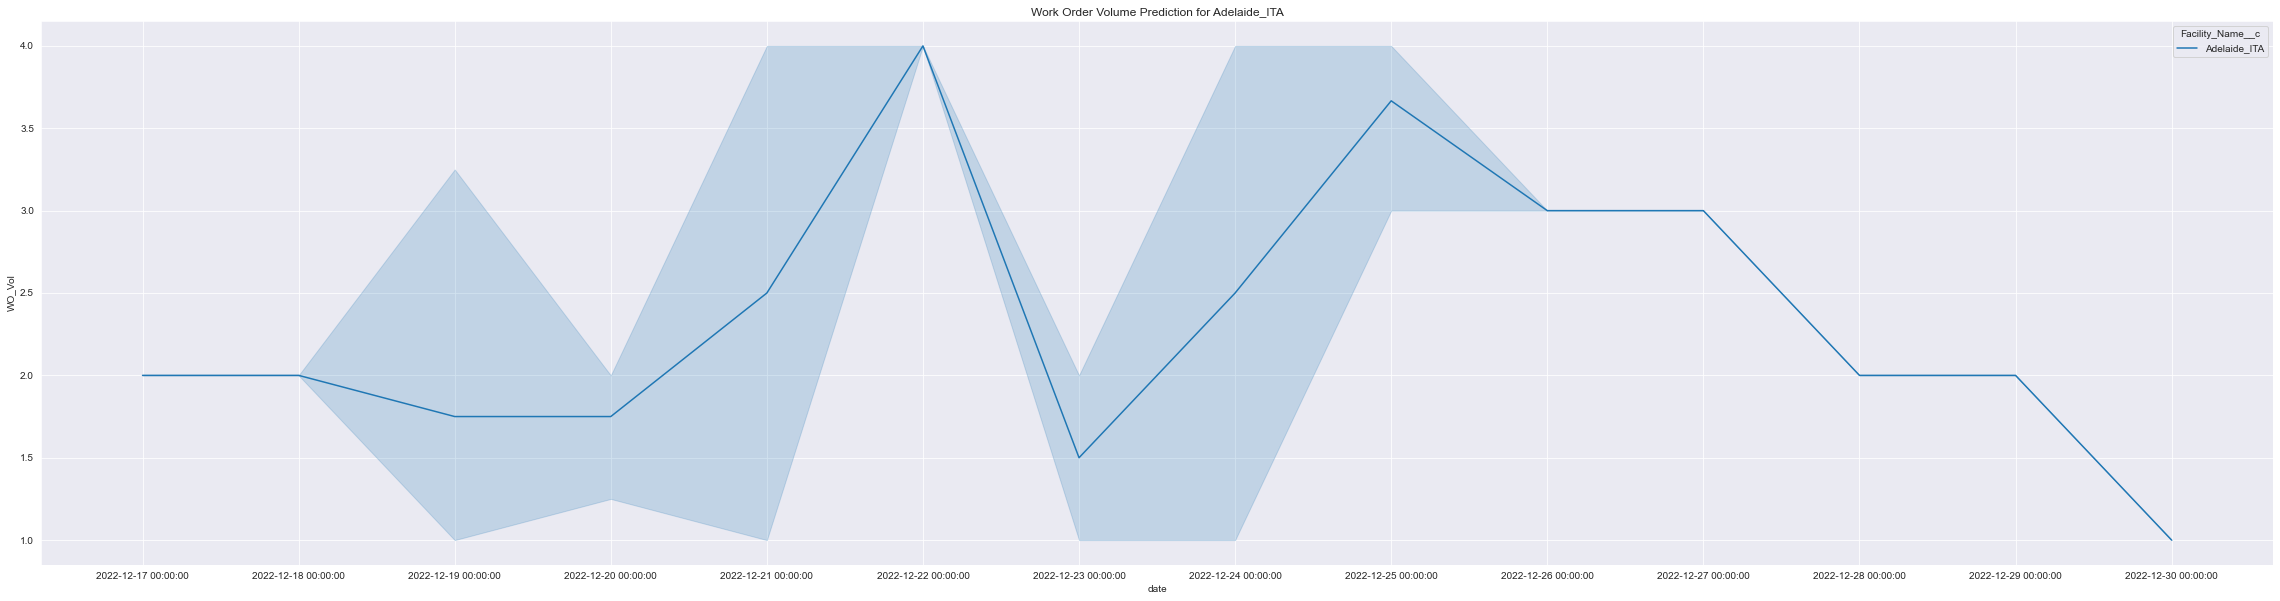

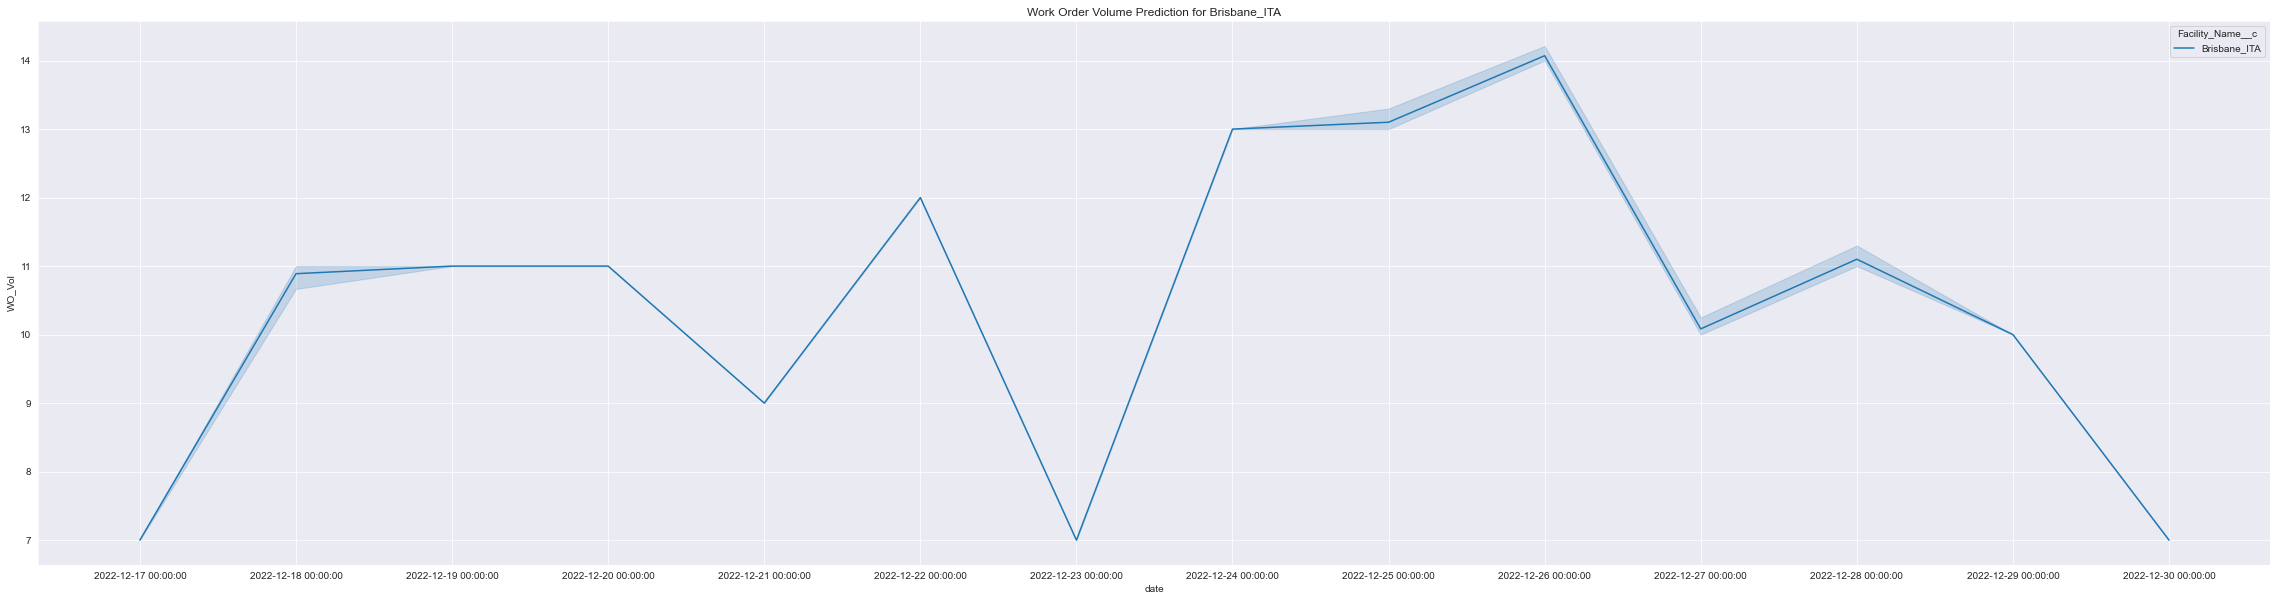

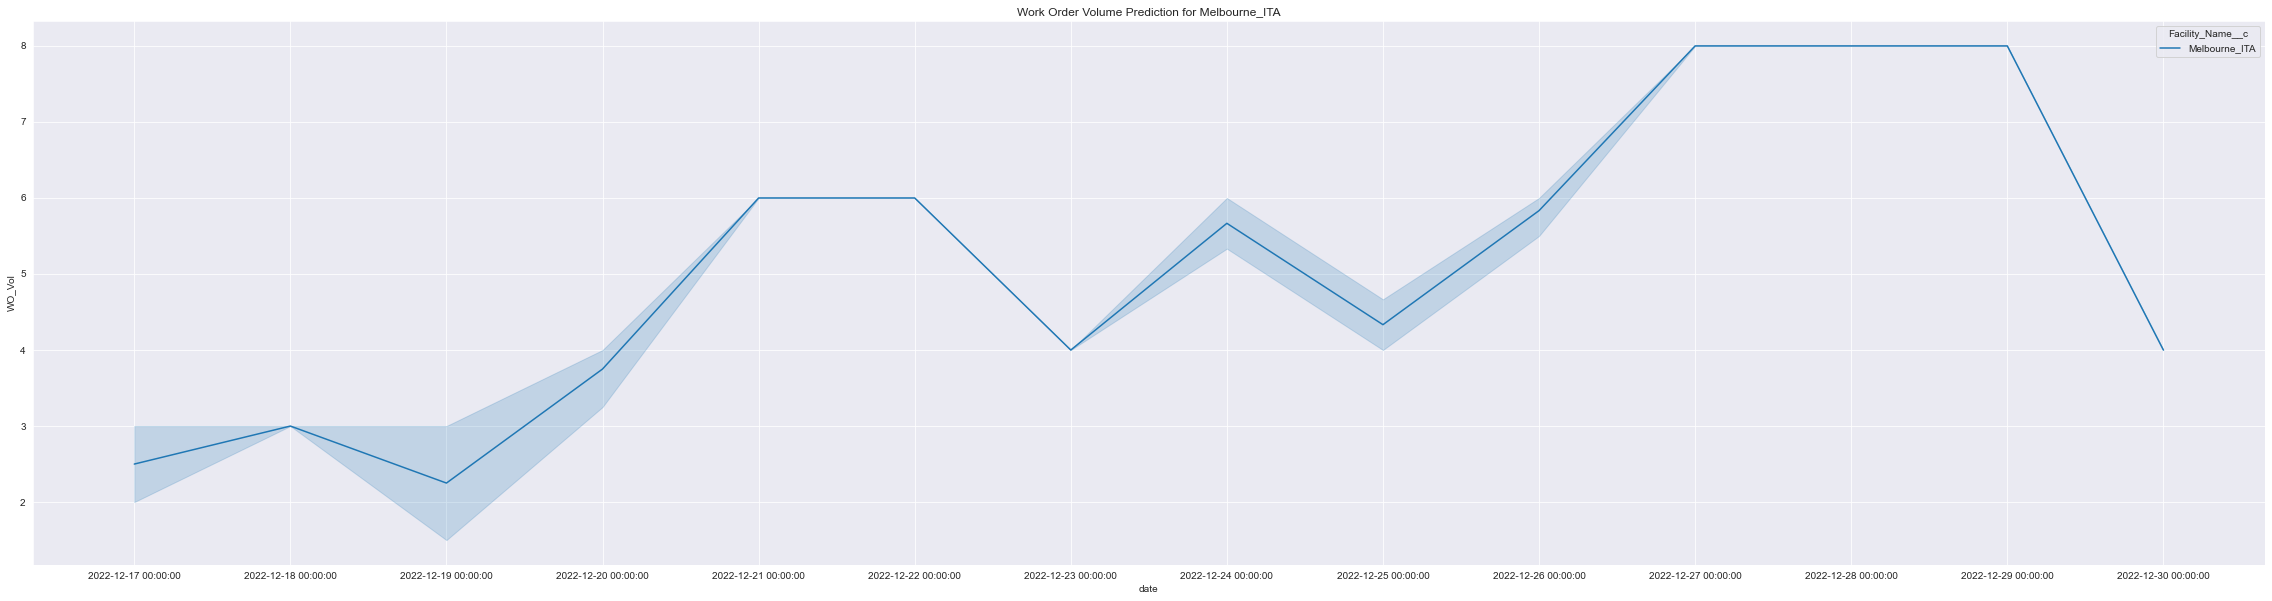

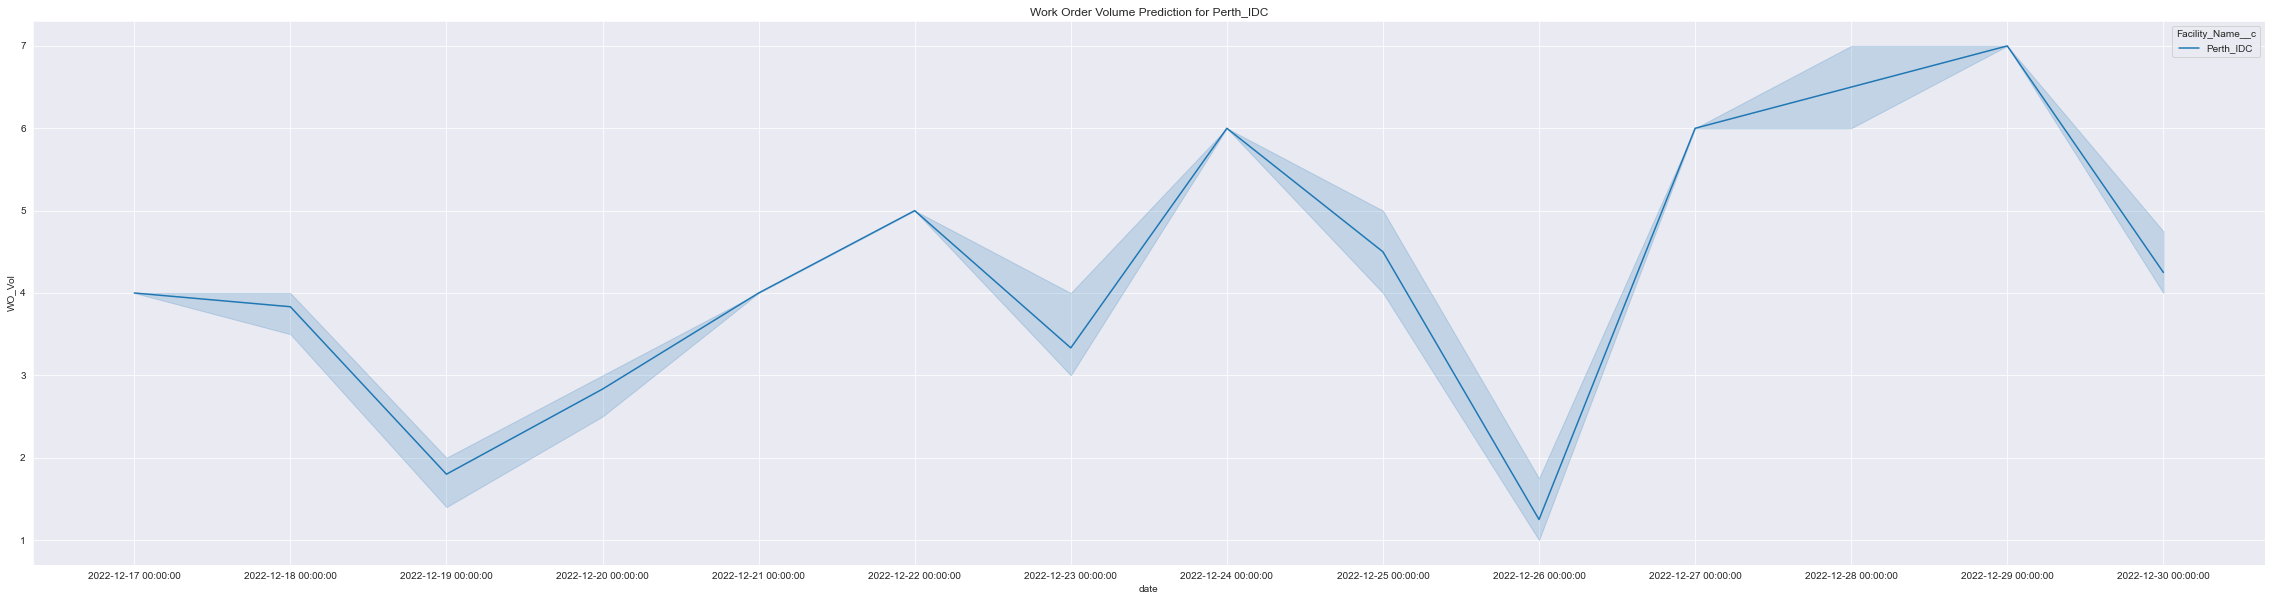

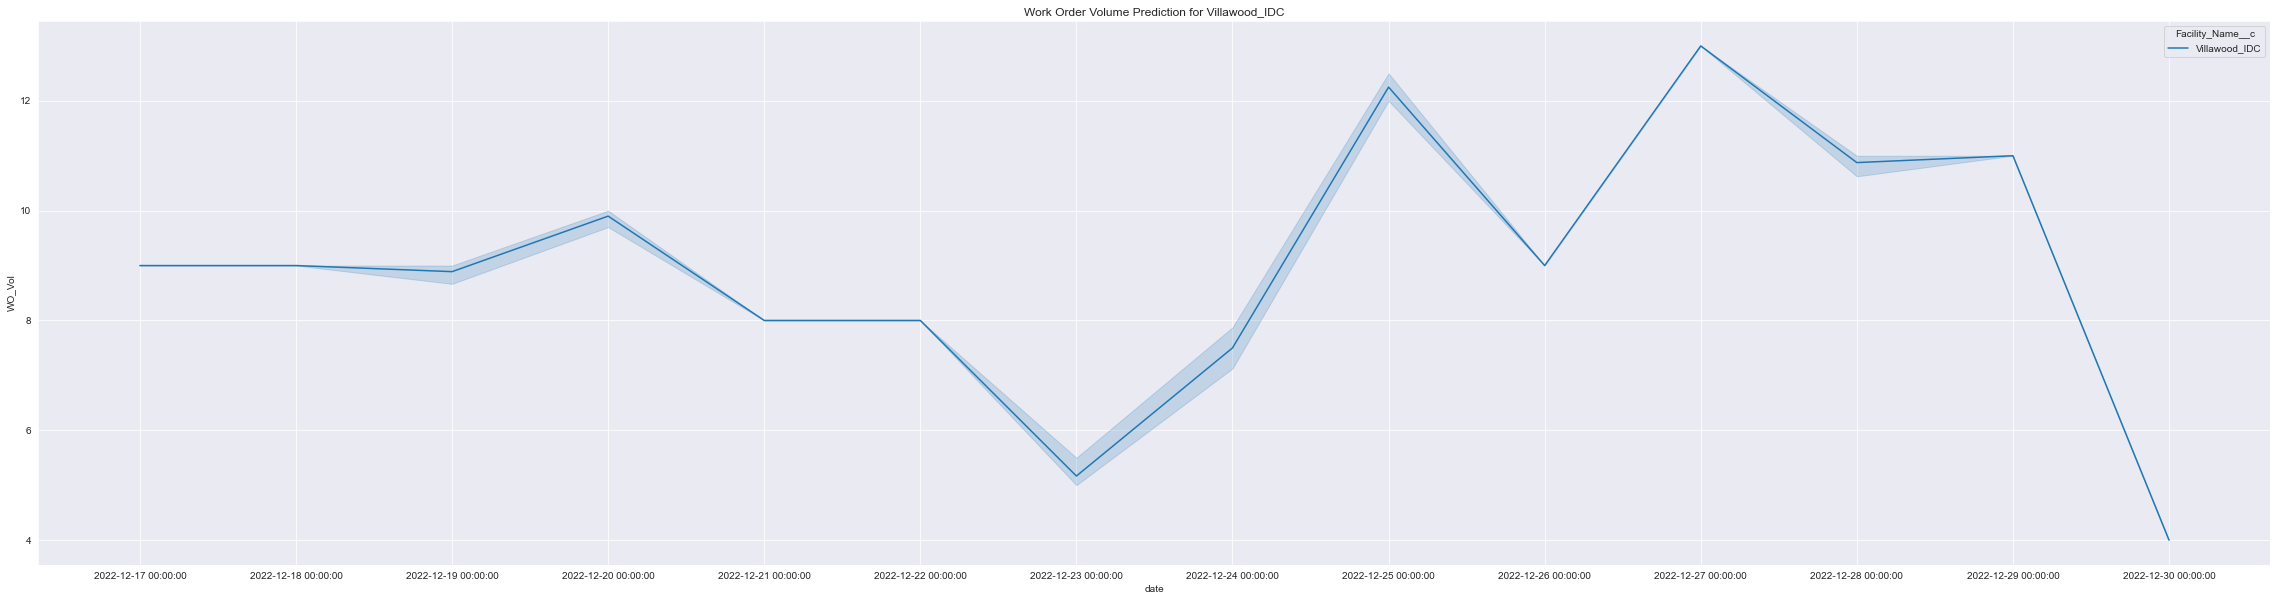

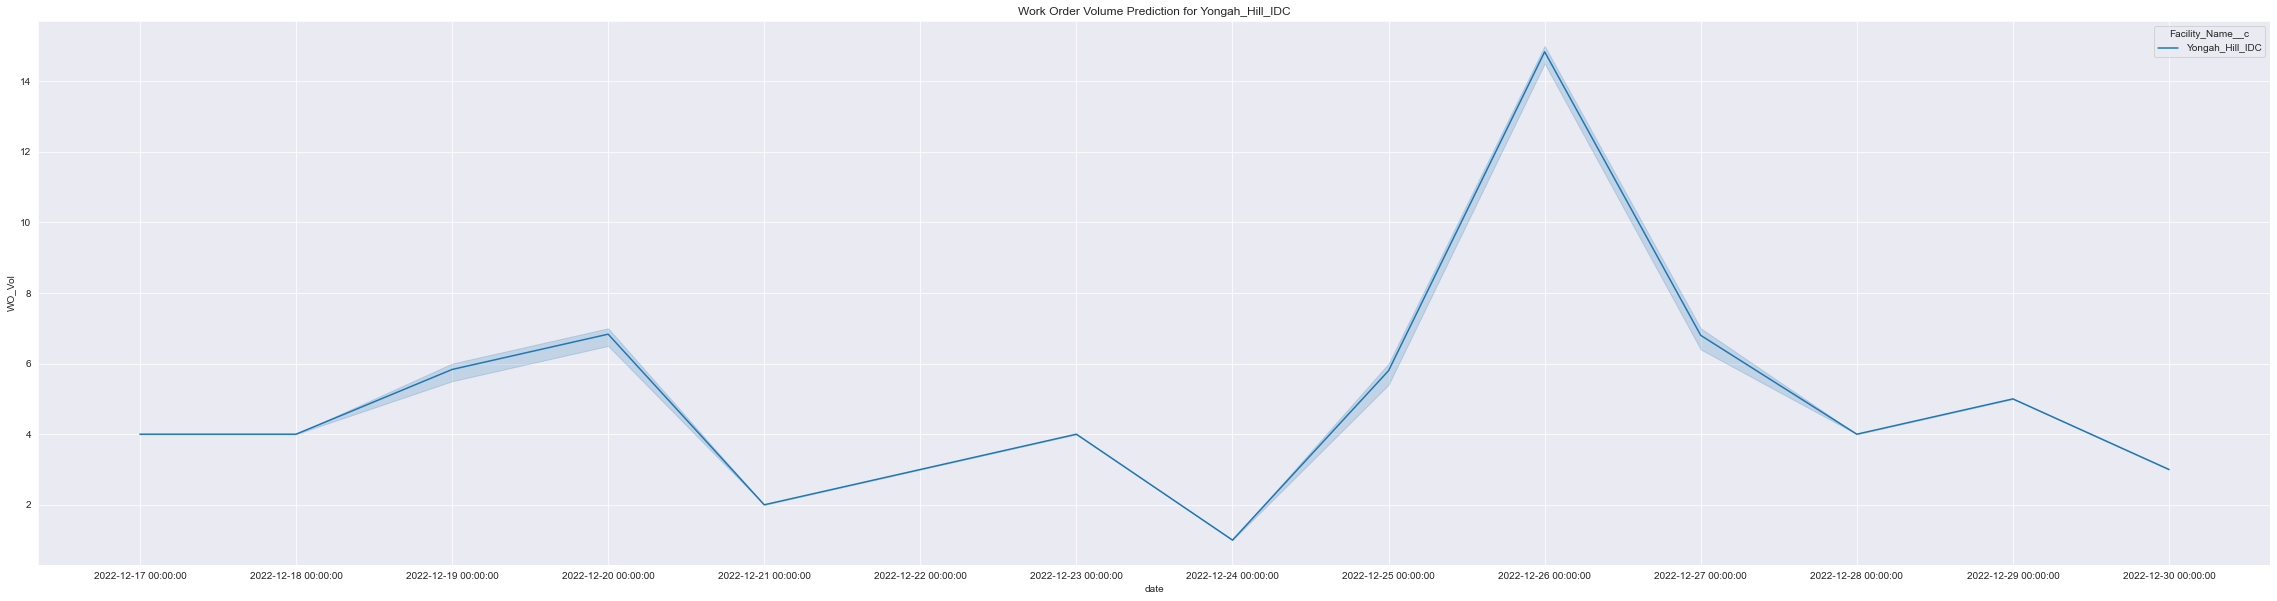

In [90]:
for facility in wo_df.Facility_Name__c.unique():
    # Create a larger figure
    plt.figure(figsize=(40, 10))  # Adjust the size as needed

    # Create the line plot
    sns.lineplot(data=wo_df[wo_df.Facility_Name__c == facility], x='date', y='WO_Vol', hue='Facility_Name__c')

    # Add a title
    plt.title(f"Work Order Volume Prediction for {facility}")

    # Show the plot
    plt.show()

<Axes: title={'center': 'Facility counts predictions'}, xlabel='date'>

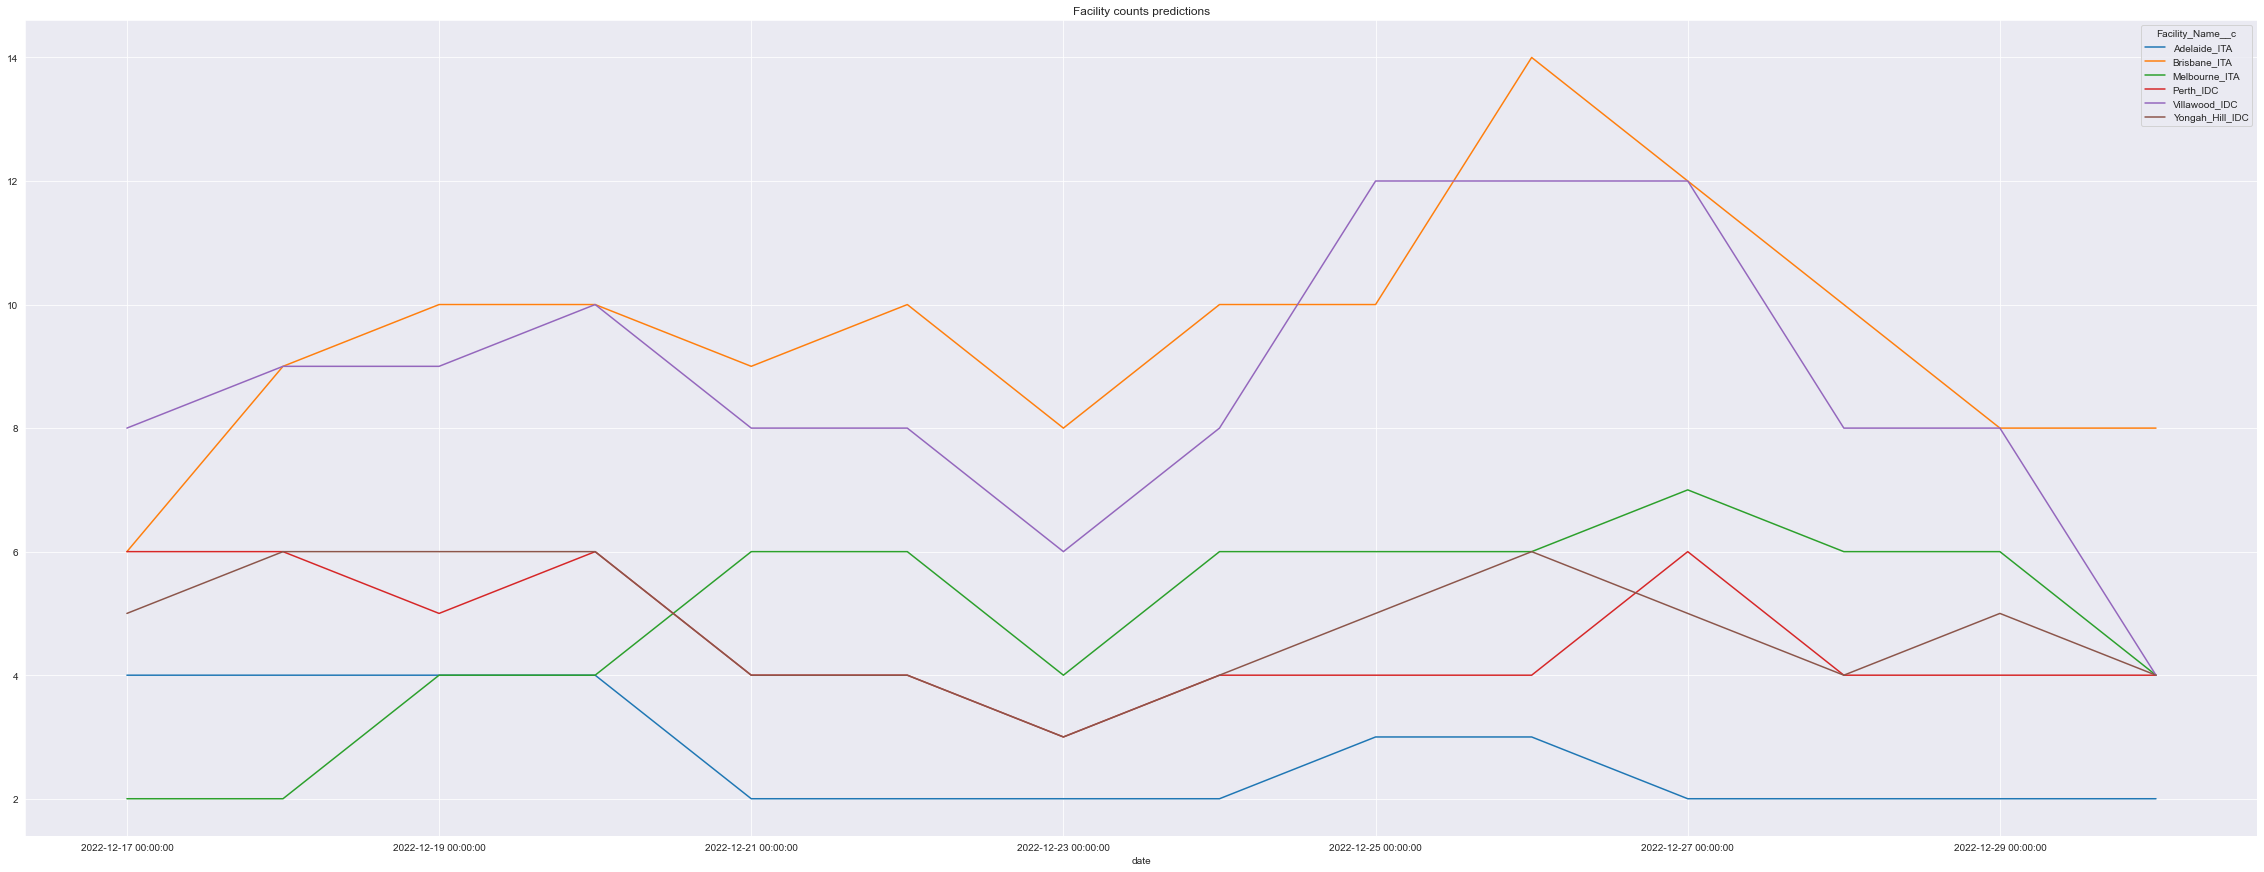

In [107]:
wo_df.groupby(['date'])['Facility_Name__c'].value_counts().unstack(fill_value=0).plot(kind='line', figsize=(40, 15), title='Facility counts predictions')

<Axes: title={'center': 'Duration bins count predictions'}, xlabel='date'>

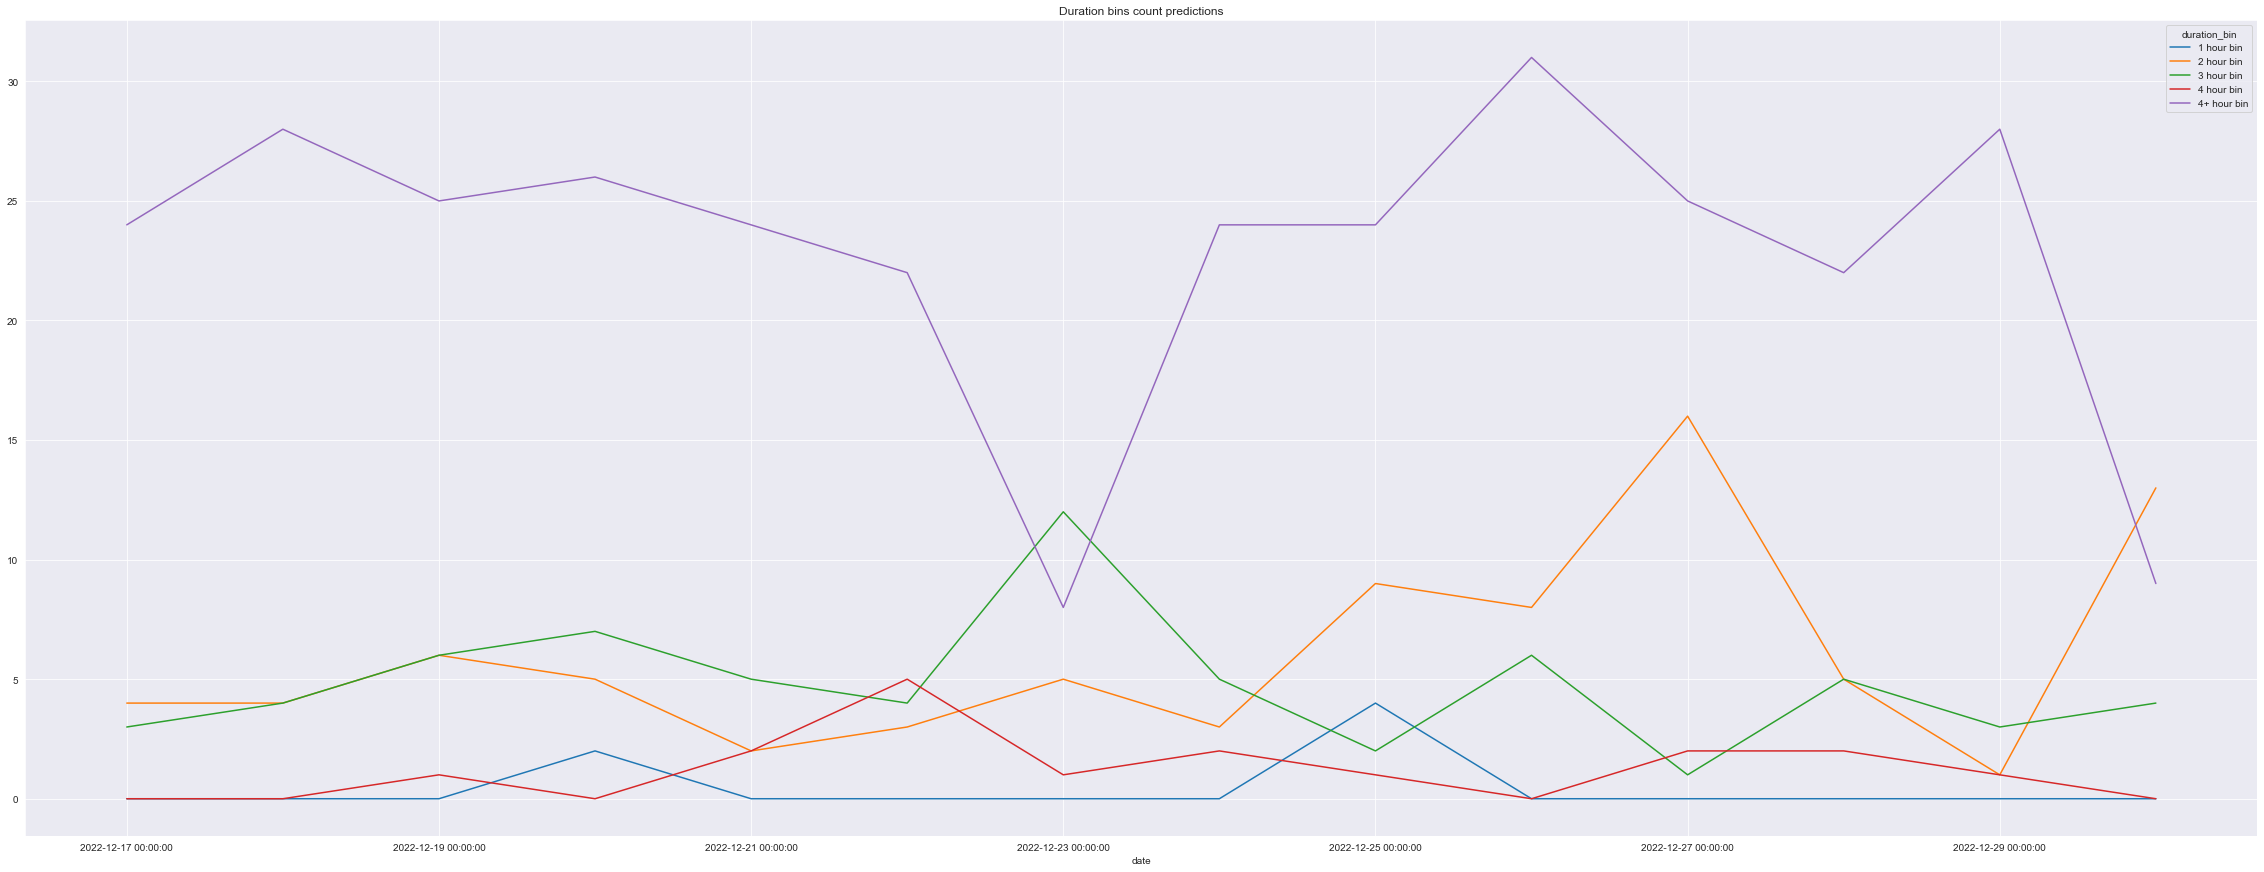

In [105]:
wo_df.groupby(['date'])['duration_bin'].value_counts().unstack(fill_value=0).plot(kind='line', figsize=(40, 15), title='Duration bins count predictions')

<Axes: title={'center': 'Duration bins count predictions'}, xlabel='date'>

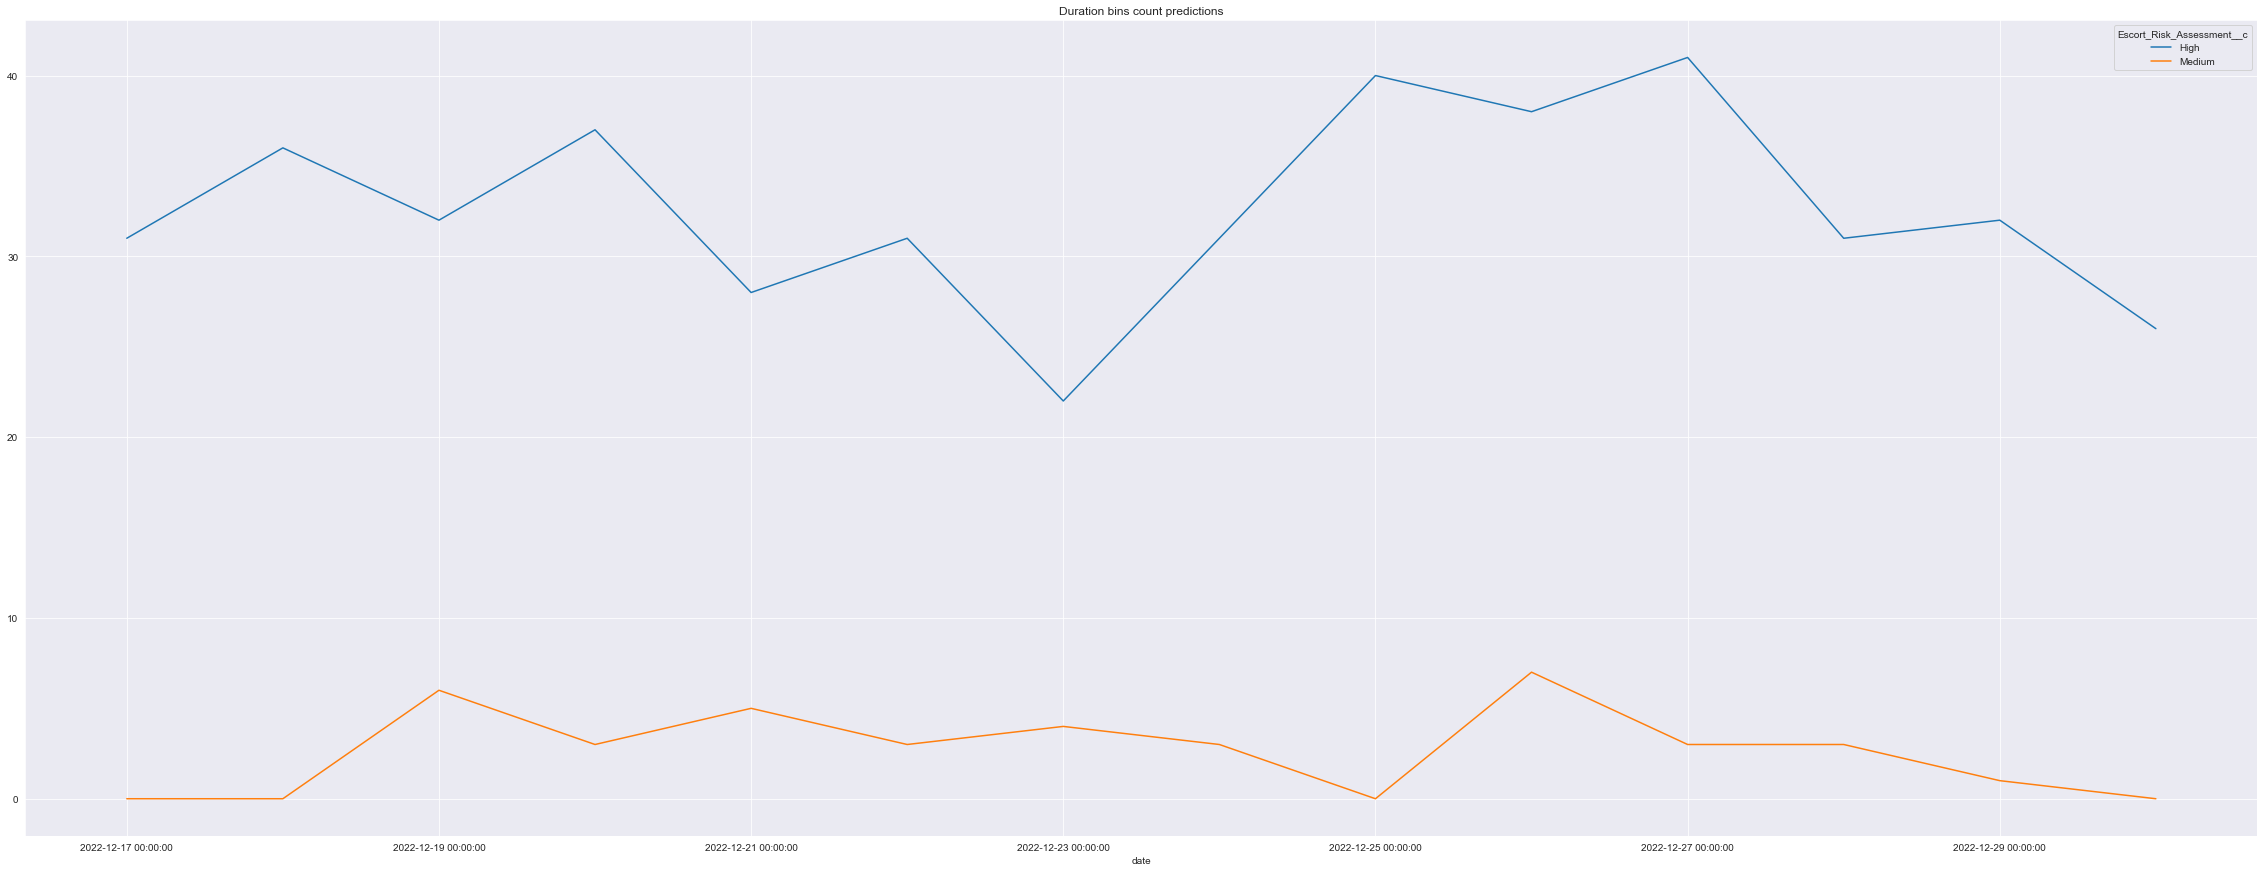

In [108]:
wo_df.groupby(['date'])['Escort_Risk_Assessment__c'].value_counts().unstack(fill_value=0).plot(kind='line', figsize=(40, 15), title='Duration bins count predictions')